# Face Mask Detection

# Load dataset

In [21]:
import os
import shutil

# Create the .kaggle directory in your home folder if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Move kaggle.json from your current working directory to ~/.kaggle
#shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

print("kaggle.json moved to:", os.path.expanduser("~/.kaggle/kaggle.json"))

kaggle.json moved to: C:\Users\zaffr/.kaggle/kaggle.json


In [22]:
# Extract dataset
import zipfile
with zipfile.ZipFile("face-mask-12k-images-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("face_mask_data")

# Exploring data

In [23]:
#Check structure
import os

dataset_path = r"D:\nti\face_mask_data"

print("Contents of dataset_path:", os.listdir(dataset_path))
for split in os.listdir(dataset_path):
    split_path = os.path.join(dataset_path, split)
    if os.path.isdir(split_path):
        print(f"\nInside {split}: {os.listdir(split_path)}")

Contents of dataset_path: ['Face Mask Dataset', 'Face_Mask_project', 'Face_Mask_Working']

Inside Face Mask Dataset: ['Test', 'Train', 'Validation']

Inside Face_Mask_project: ['Test', 'Train', 'Validation']

Inside Face_Mask_Working: ['Test', 'Train', 'Validation']


In [24]:
#Check count
import os

dataset_path = r"D:\nti\face_mask_data\Face Mask Dataset"

for split in ["Train", "Validation", "Test"]:
    for label in ["WithMask", "WithoutMask"]:
        folder = os.path.join(dataset_path, split, label)
        print(f"{split} / {label}: {len(os.listdir(folder))} images")


Train / WithMask: 5000 images
Train / WithoutMask: 5000 images
Validation / WithMask: 400 images
Validation / WithoutMask: 400 images
Test / WithMask: 483 images
Test / WithoutMask: 509 images


In [25]:
# Count images per class
import os
import matplotlib.pyplot as plt
import cv2  
import random

# Path to your dataset
dataset_path = r"D:\nti\face_mask_data\Face Mask Dataset"

#making lists for splits & labels
splits = ["Validation", "Test", "Train"]
labels = ["WithMask", "WithoutMask"]

# Counting
counts = {split: {label: 0 for label in labels} for split in splits}

for split in splits:
    for label in labels:
        folder = os.path.join(dataset_path, split, label)
        counts[split][label] = len(os.listdir(folder))

# Print counts
for split in splits:
    for label in labels:
        print(f"{split} / {label}: {counts[split][label]} images")


Validation / WithMask: 400 images
Validation / WithoutMask: 400 images
Test / WithMask: 483 images
Test / WithoutMask: 509 images
Train / WithMask: 5000 images
Train / WithoutMask: 5000 images


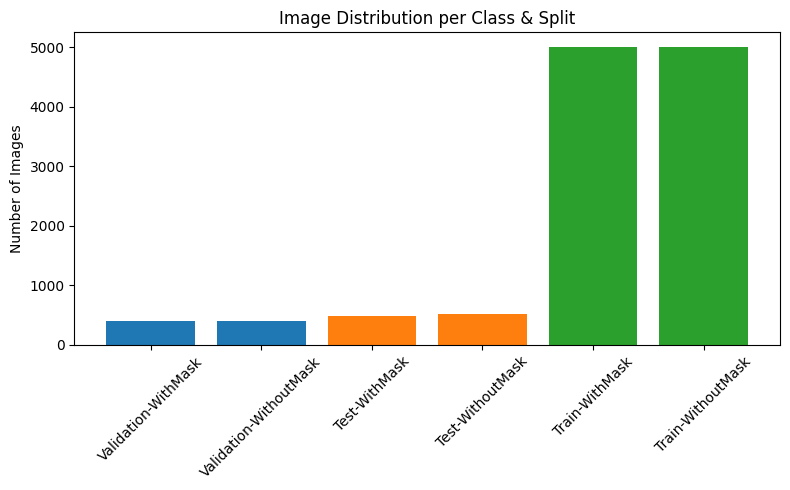

In [26]:
# Plot class distribution
plt.figure(figsize=(8, 5))       
for i, split in enumerate(splits):
    plt.bar(
        [f"{split}-{label}" for label in labels],
        [counts[split][label] for label in labels],
        label=split
    )

plt.ylabel("Number of Images")
plt.title("Image Distribution per Class & Split")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

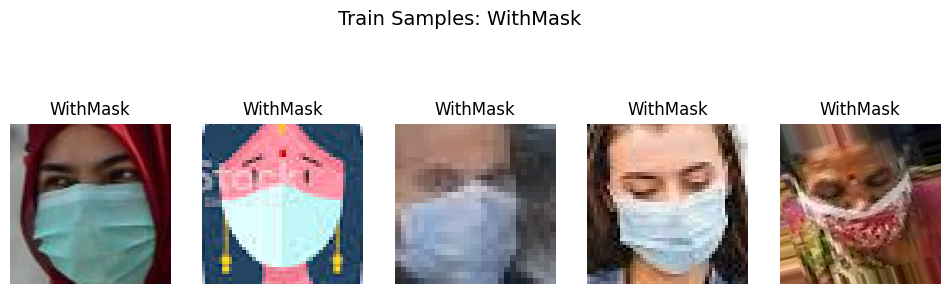

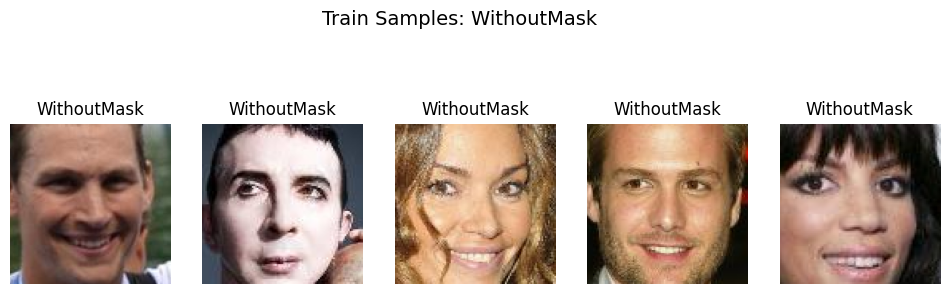

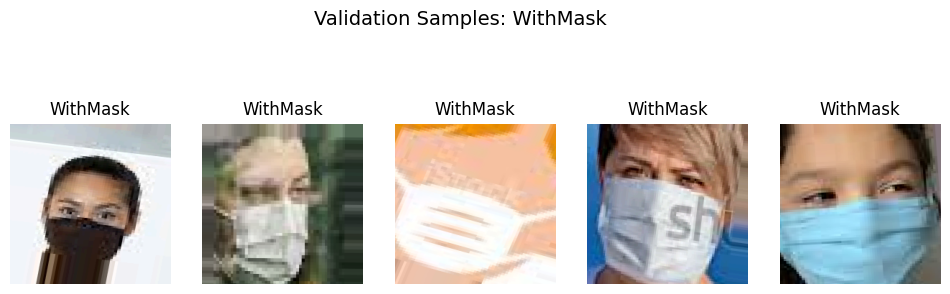

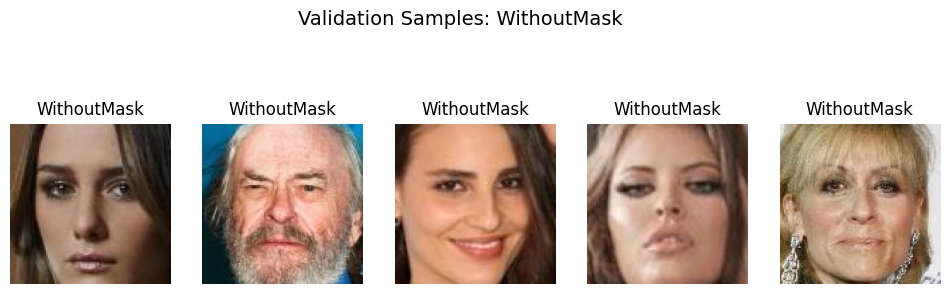

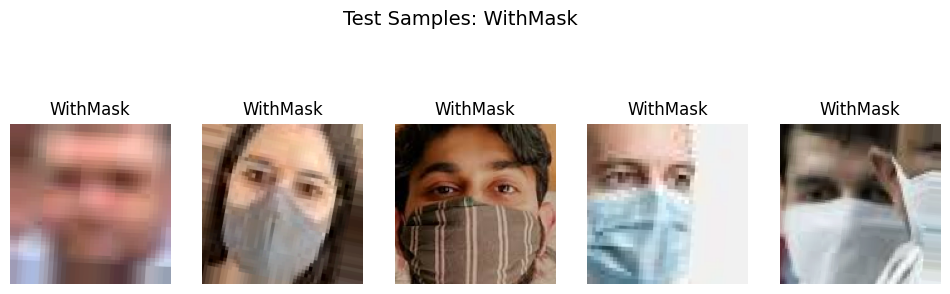

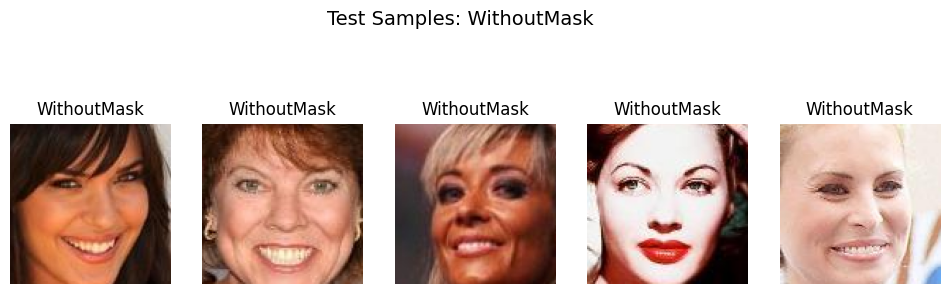

In [27]:
# Show sample images 
def show_samples(split, label, num_samples=5):
    folder = os.path.join(dataset_path, split, label)
    sample_files = random.sample(os.listdir(folder), num_samples)
    plt.figure(figsize=(12, 4))
    for i, file in enumerate(sample_files):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(label)
    plt.suptitle(f"{split} Samples: {label}", fontsize=14)
    plt.show()

# Show samples from each class in each folder
for label in labels:
    show_samples("Train", label)

for label in labels:
    show_samples("Validation", label)

for label in labels:
    show_samples("Test", label)



# Dataset cleanup step

Some images might be:

- Corrupted (can’t be read by OpenCV/PIL)

- Wrong format (like .txt or metadata accidentally in the folder)

- Unreadable / too small / blank

In [1]:
import os
import cv2

dataset_path = r"D:\nti\face_mask_data\Face Mask Dataset"
splits = ["Validation", "Test", "Train"]
labels = ["WithMask", "WithoutMask"]

bad_files = []

for split in splits:
    for label in labels:
        folder = os.path.join(dataset_path, split, label)
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file)
            try:
                img = cv2.imread(file_path)
                if img is None or img.size == 0:
                    bad_files.append(file_path)
            except:
                bad_files.append(file_path)

print(f"Found {len(bad_files)} bad files.")
for bf in bad_files:
    print(bf)


Found 0 bad files.


Making a copy of original dataset

In [19]:
import shutil

original_path = r"D:\nti\face_mask_data\Face Mask Dataset"
working_path  = r"D:\nti\face_mask_data\Face_Mask_project"

# Copy the entire folder tree
#shutil.copytree(original_path, working_path)
print(f"Copied dataset to: {working_path}")

Copied dataset to: D:\nti\face_mask_data\Face_Mask_project


In [20]:
import cv2
import os

dataset_path = r"D:\nti\face_mask_data\Face_Mask_project"
splits = ["Validation", "Test", "Train"]
labels = ["WithMask", "WithoutMask"]

threshold = 100  # lower = stricter blur detection
blurry_files = []

for split in splits:
    for label in labels:
        folder = os.path.join(dataset_path, split, label)
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file) 
            img = cv2.imread(file_path)  
            if img is None: 
                continue
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            variance = cv2.Laplacian(gray, cv2.CV_64F).var()
            if variance < threshold:
                blurry_files.append((file_path, variance))

print(f"Found {len(blurry_files)} blurry images.")
for f, var in blurry_files[:7]: 
    print(f"{f} -> Variance: {var}")

Found 968 blurry images.
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1176.png -> Variance: 11.839174032211304
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1364.png -> Variance: 17.81552207097411
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1370.png -> Variance: 52.53539703786373
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1406.png -> Variance: 16.1548380702734
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1416.png -> Variance: 92.98774006590247
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1599.png -> Variance: 69.90062880143523
D:\nti\face_mask_data\Face_Mask_project\Validation\WithMask\1758.png -> Variance: 74.15447833761573


# Preprocessing on blurry files

Pipeline: Denoise → CLAHE → Sharpen

In [21]:
import cv2
import os
import numpy as np

dataset_path = r"D:\nti\face_mask_data\Face_Mask_project"
splits = ["Validation", "Test", "Train"]
labels = ["WithMask", "WithoutMask"]

threshold = 100  # Laplacian variance blur threshold
processed_count = 0

# CLAHE setup
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

for split in splits:
    for label in labels:
        folder = os.path.join(dataset_path, split, label)
        for file in os.listdir(folder):
            file_path = os.path.join(folder, file) 
            img = cv2.imread(file_path)  
            if img is None: 
                continue

            # Detect blur
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            variance = cv2.Laplacian(gray, cv2.CV_64F).var()

            if variance < threshold:
                # 1️-> Denoise (Bilateral filter preserves edges)
                img_denoised = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

                # 2️-> CLAHE on L-channel for contrast improvement
                lab = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2LAB)
                l, a, b = cv2.split(lab)
                l = clahe.apply(l)
                lab = cv2.merge((l, a, b))
                img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

                # 3️->Sharpen (Unsharp Mask)
                gaussian = cv2.GaussianBlur(img_clahe, (0,0), 3)
                img_sharp = cv2.addWeighted(img_clahe, 1.5, gaussian, -0.5, 0)

                # Save over original
                cv2.imwrite(file_path, img_sharp)
                processed_count += 1

print(f"Enhanced {processed_count} blurry images with denoise + CLAHE + sharpening.")


Enhanced 968 blurry images with denoise + CLAHE + sharpening.


# Resizing images


In [22]:
import os
from PIL import Image

# Path to your working dataset
working_path =  r"D:\nti\face_mask_data\Face_Mask_project"

target_size = (128, 128)

# Loop through each image and resize
for root, dirs, files in os.walk(working_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            img = Image.open(file_path)
            img = img.resize(target_size, Image.LANCZOS)  # High-quality resize
            img.save(file_path)  # overwrite original
        except Exception as e:
            print(f"Error resizing {file_path}: {e}")
print(f"All images resized to {target_size} in {working_path}")

All images resized to (128, 128) in D:\nti\face_mask_data\Face_Mask_project


In [23]:
# Verify random images
import random

print("\n Verifying a few images:")
all_files = [os.path.join(dp, f) for dp, dn, filenames in os.walk(working_path) for f in filenames]
for file_path in random.sample(all_files, 10):
    try:
        img = Image.open(file_path)
        print(f"{file_path} -> {img.size}")
    except Exception as e:
        print(f"Error reading {file_path}: {e}")



 Verifying a few images:
D:\nti\face_mask_data\Face_Mask_project\Train\WithMask\Augmented_88_9639038.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Test\WithMask\Augmented_82_8198527.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithMask\Augmented_177_8673951.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithMask\Augmented_644_5047336.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Test\WithMask\Augmented_316_5748974.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithMask\Augmented_841_9722904.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithoutMask\3666.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithoutMask\1313.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithMask\Augmented_74_8630807.png -> (128, 128)
D:\nti\face_mask_data\Face_Mask_project\Train\WithoutMask\1875.png -> (128, 128)


# Traing Data Model

importing libraries for using cnn

In [4]:
# TensorFlow library for building and training neural networks
import tensorflow as tf
#  Keras module from TensorFlow for building neural network models
from tensorflow import keras
# Layers module from Keras for defining different types of layers in a neural network
from tensorflow.keras import layers
# Sequential class from Keras for creating sequential neural network models
from tensorflow.keras.models import Sequential
# Specific layers from Keras for building the neural network architecture
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
# TensorBoard callback from Keras for monitoring training progress
from tensorflow.keras.callbacks import TensorBoard
# Classification_report function from scikit-learn for evaluating classification models
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Loading the dataset from disk (your folders) into a TensorFlow-friendly format that your model can train on

In [6]:
# Load datasets 
train_data = keras.utils.image_dataset_from_directory(
    r"D:\nti\face_mask_data\Face_Mask_project\Train",
    batch_size=32,
    image_size=(128, 128),
    label_mode='categorical'
)

validation_data = keras.utils.image_dataset_from_directory(
    r"D:\nti\face_mask_data\Face_Mask_project\Validation",
    batch_size=32,
    image_size=(128, 128),
    label_mode='categorical'
)

test_data = keras.utils.image_dataset_from_directory(
    r"D:\nti\face_mask_data\Face_Mask_project\Test",
    batch_size=32,
    image_size=(128, 128),
    label_mode='categorical',
    shuffle=False
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.
Found 992 files belonging to 2 classes.


Data Augumentation -> so the model learns from more variety
Rescaling & Converting them (.png) into batches of tensors, and attaches labels

In [7]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"), #randomly flips images horizontally
    layers.RandomRotation(0.1), #rotates by up to ±10%
    layers.RandomZoom(0.1), #zooms in/out by up to 10%
])

rescale = layers.Rescaling(1./255)

In [8]:
# Apply augmentation + rescaling to training dataset
train_data = train_data.map(lambda x, y: (rescale(data_augmentation(x, training=True)), y))

In [9]:
# Apply rescaling only to validation and test datasets & not augementation so the model validate on read dataset images
validation_data = validation_data.map(lambda x, y: (rescale(x), y))
test_data = test_data.map(lambda x, y: (rescale(x), y))

Use Keras layers to build a CNN inside a Sequential model.

Train the model while monitoring progress with TensorBoard.

After training, evaluate using classification_report to understand how well your model distinguishes masked vs. unmasked faces.

You are creating a linear stack of layers, where each layer's output is the input to the next one. This is one of the simplest ways to build neural networks in Keras.

First Convolution Block ->

- Applies 32 filters of size 3×3 to detect features like edges, corners, and textures

- Keeps positive values, removes negative ones → helps non-linearity -> (relu)

MaxPooling2D layers (first) ->

- Reduces the image size by keeping only the maximum pixel in a small region → reduces computation & helps detect patterns at different scales

Second Convolution Block ->

- Again 32 filters, 3×3 kernel.

- Learns more complex patterns (e.g., facial features, mask edges) from the previous features.

- Another pooling layer → reduces spatial size even further

Third Convolution Block ->

- Even deeper layer — detects high-level features like mask shape or nose/eye patterns

- Pooling again for dimensionality reduction

Flatten Layer ->

- Turns the 2D feature maps (height × width × filters) into a 1D vector

- This is needed for the Dense layers (fully connected layers)

Dropout Layer ->

- Randomly drops 50% of neurons during training → helps prevent overfitting

- Forces the network to not rely too heavily on specific neurons

Output Layer ->

- Dense(2) → Output has 2 neurons → because you have 2 classes:

 - Class 0 = "WithMask"

 - Class 1 = "WithoutMask"

- Softmax activation: Converts raw scores into probabilities that sum to 1.0

In [10]:
#input layer
input_layer = tf.keras.layers.Input(shape=(128,128,3)) #This defines the shape of the input images

#Model Architecture 
model = tf.keras.models.Sequential([ #model container

    input_layer,

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(2, activation='softmax'), 
])

In [11]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │        12,546 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,938 (124.76 KB)

 Trainable params: 31,938 (124.76 KB)

 Non-trainable params: 0 (0.00 B)

**Model Compile**

Okay model, here’s how you’re going to learn (Adam), what you’re trying to minimize (categorical cross-entropy), and how I’ll judge your performance (accuracy)

Adam = Adaptive Moment Estimation ->

- It’s a smart version of gradient descent that automatically adjusts the learning rate for each parameter

- The method the model uses to figure out how to change its weights to get better results

categorical_crossentropy ->

- If your labels are single integers (0 or 1) or a single probability column

Metrics — ['accuracy'] ->

- Tells Keras to track accuracy during training and evaluation.

- Accuracy = Percentage of predictions where the highest probability class matches the true label

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Fit The Model**

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 20 

early_stopping = EarlyStopping(
    patience=5,              
    restore_best_weights=True
)


In [25]:
training = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 88s 272ms/step - accuracy: 0.9124 - loss: 0.2088 - val_accuracy: 0.9787 - val_loss: 0.0690
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 336ms/step - accuracy: 0.9556 - loss: 0.1231 - val_accuracy: 0.9750 - val_loss: 0.0656
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 246ms/step - accuracy: 0.9686 - loss: 0.0884 - val_accuracy: 0.9825 - val_loss: 0.0458
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 105s 337ms/step - accuracy: 0.9744 - loss: 0.0751 - val_accuracy: 0.9875 - val_loss: 0.0282
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 146s 465ms/step - accuracy: 0.9746 - loss: 0.0701 - val_accuracy: 0.9875 - val_loss: 0.0321
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 208ms/step - accuracy: 0.9753 - loss: 0.0687 - val_accuracy: 0.9900 - val_loss: 0.0198
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 98s 313ms/step - accuracy: 0.9785 - loss: 0.0589 - val_accuracy: 0.9850 - val_loss: 0.0304
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 345ms/step - accuracy: 0.9794 - lo

In [26]:
best_epoch = early_stopping.stopped_epoch - early_stopping.patience + 1
print("Best epoch:", best_epoch)

Best epoch: 6


**Evaluate the Model**

In [27]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data) 

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9889 - loss: 0.0483
Test Loss: 0.04831923916935921
Test Accuracy: 0.9889112710952759


**History Plot**

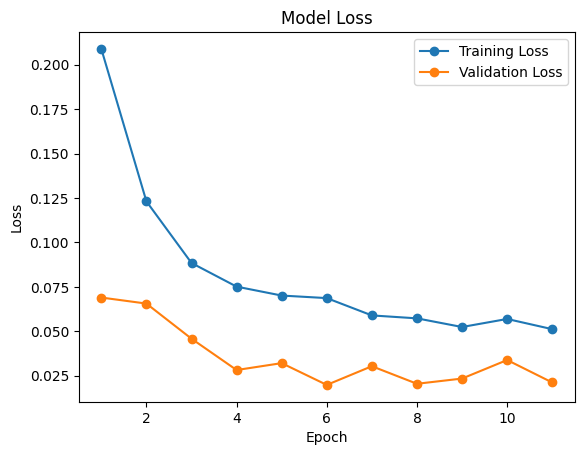

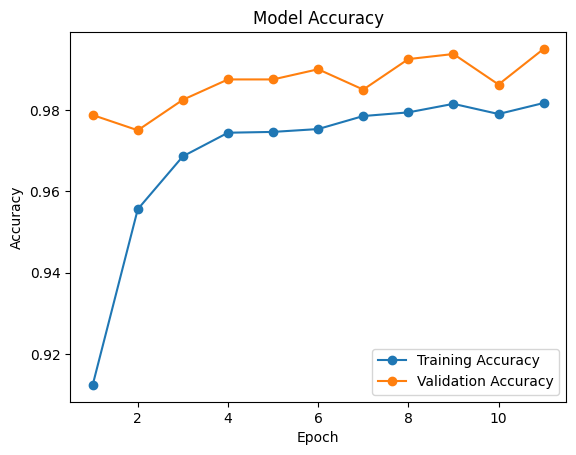

In [29]:
# Define epochs
import matplotlib.pyplot as plt
epochs = range(1, len(training.history['loss']) + 1)

# Plot training & validation loss
plt.plot(epochs, training.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, training.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training & validation accuracy
plt.plot(epochs, training.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, training.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Confusion matrix & classification report**

In [30]:
# Get true labels and predictions
y_true = np.concatenate([y for x, y in test_data], axis=0)
y_pred = model.predict(test_data)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


In [31]:
# Convert from one-hot to class indices
y_true_labels = np.argmax(y_true, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

In [32]:
# Classification report
print(classification_report(y_true_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.99      0.99      0.99       509

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [33]:
# Confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

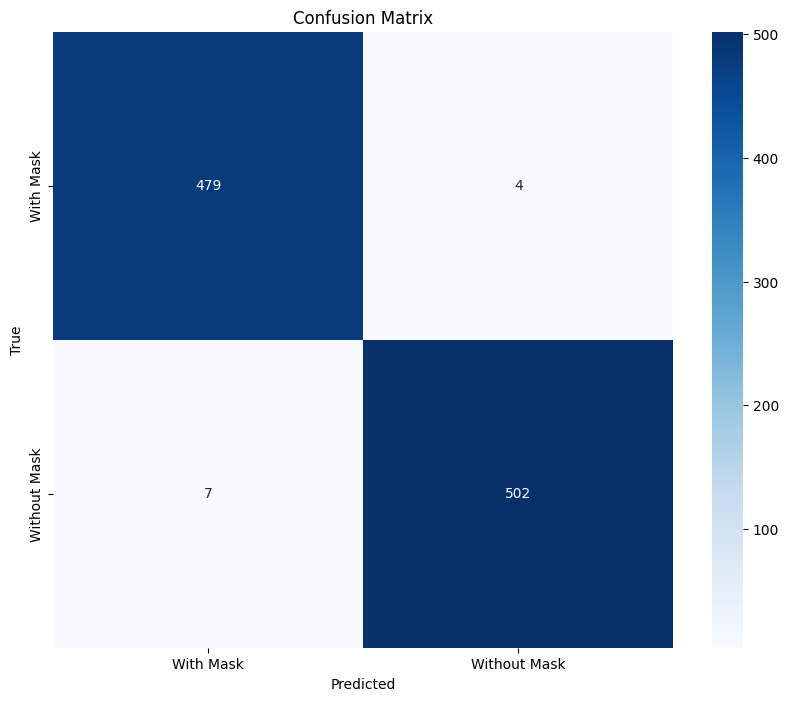

In [35]:
# Plot confusion matrix
import seaborn as sns 

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['With Mask', 'Without Mask'],
            yticklabels=['With Mask', 'Without Mask'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Deploy The Model**

In [ ]:
#model.save("face_mask_model.keras")

In [37]:
#its recommended because its more lightweight
model.save("face_mask_model.h5")

**Prepare the deployment files**